In [ ]:
Stundent Name : Smita Waghmare
Project Title : Cinema Ticket Sales Analysis And Prediction

In [ ]:
Project Objective : In this project, I have analyzed cinema ticket sales data 
and tried to build a model to predict total ticket sales using features like ticket 
price,show time, occupancy, and seating capacity.

Data Details : I used a dataset from Kaggle which has more than 
1.4 lakh rows. It contains features like ticket_price, show_time, 
occu_perc, capacity, and the target variable is total_sales.


In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline 

data =pd.read_csv('/kaggle/input/cinema-ticket/cinemaTicket_Ref.csv')
data.head()
# is a command used to see the first 5 rows of the dataset.

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [24]:
# This line is used to fill in missing values (NaN) in the dataset 
# using linear interpolation.

data.interpolate(method='linear', inplace=True)
data.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,week,weekDay
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5,18.0,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5,18.0,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5,18.0,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5,18.0,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5,18.0,5


In [25]:
# gives a summary of the DataFrame....
# It tells you:

# Total number of rows and columns
# Column names
# Data types (e.g., int, float, object)
# How many non-null (non-missing) values are in each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   film_code     142524 non-null  int64         
 1   cinema_code   142524 non-null  int64         
 2   total_sales   142524 non-null  int64         
 3   tickets_sold  142524 non-null  int64         
 4   tickets_out   142524 non-null  int64         
 5   show_time     142524 non-null  int64         
 6   occu_perc     142524 non-null  float64       
 7   ticket_price  142524 non-null  float64       
 8   ticket_use    142524 non-null  int64         
 9   capacity      142524 non-null  float64       
 10  date          142524 non-null  datetime64[ns]
 11  month         142524 non-null  int32         
 12  quarter       142524 non-null  int32         
 13  day           142524 non-null  int32         
 14  week          142524 non-null  Float64       
 15  weekDay       142

In [26]:
data.columns
 # is used to show the names of all columns in your dataset.

Index(['film_code', 'cinema_code', 'total_sales', 'tickets_sold',
       'tickets_out', 'show_time', 'occu_perc', 'ticket_price', 'ticket_use',
       'capacity', 'date', 'month', 'quarter', 'day', 'week', 'weekDay'],
      dtype='object')

In [28]:
#Checking number of rows and columns
data.shape  

(142524, 16)

In [29]:
#It's optional we can use (df.info()) instead of this
data.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use               int64
capacity               float64
date            datetime64[ns]
month                    int32
quarter                  int32
day                      int32
week                   Float64
weekDay                  int32
dtype: object

In [61]:
# Show minimum price
data['ticket_price'].min()

483.8709677419355

In [60]:
#show max price
data['ticket_price'].max()

700000.0

<Axes: title={'center': 'clear data'}, ylabel='Density'>

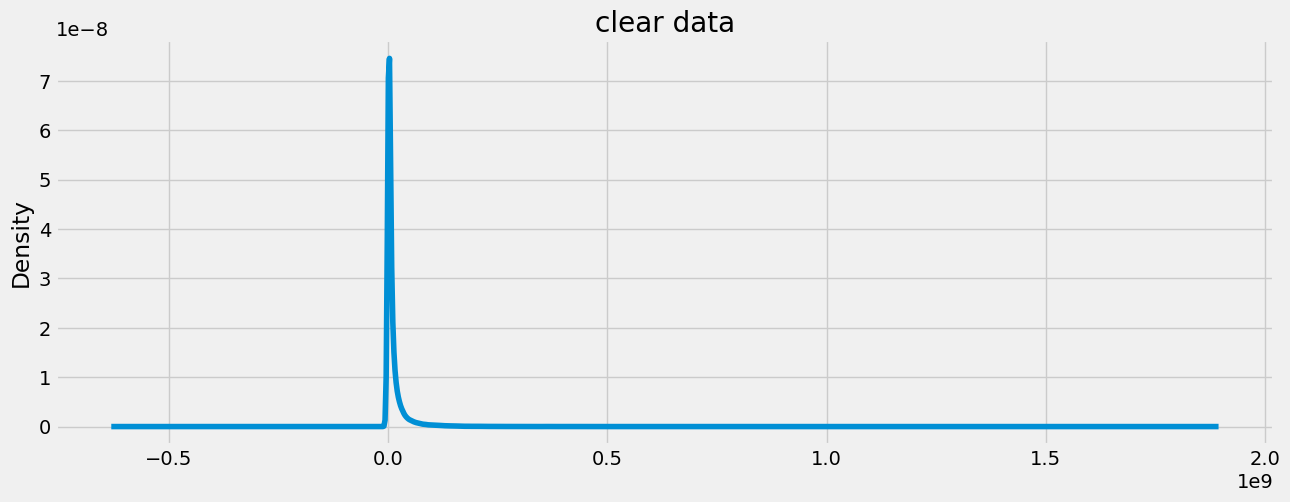

In [31]:
# histogram grap
# 1.This code creates a smooth curve that shows how the values in total_sales are 
# distributed.
# 2. It helps to understand whether sales are mostly low, high, or spread out.
# 3. KDE is similar to a histogram, but smoother.

plt.figure(figsize = (14,5))
plt.title('clear data')
data['total_sales'].plot(kind = 'kde')

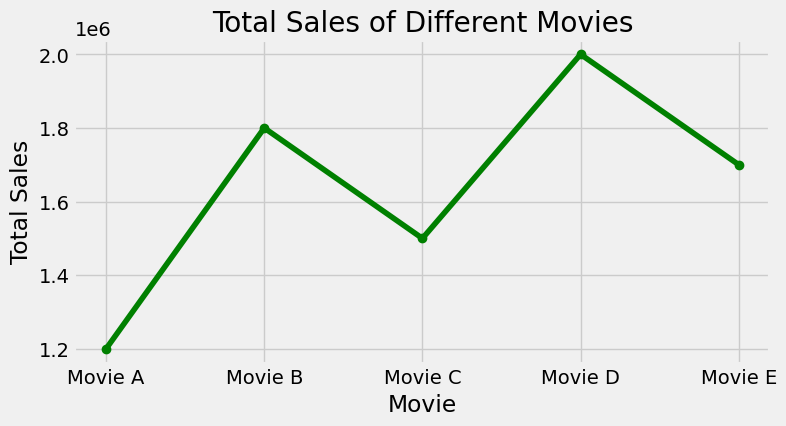

In [32]:
                                       
import matplotlib.pyplot as plt

# Dummy movie names and sales
movies = ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
sales = [1200000, 1800000, 1500000, 2000000, 1700000]


plt.figure(figsize=(8, 4))
plt.plot(movies, sales, marker='o', linestyle='-', color='green')
plt.title('Total Sales of Different Movies')
plt.xlabel('Movie')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

# To explain how a line plot works, I have created a small example using dummy movie
# names such as Movie A, Movie B, Movie C, etc.In this example,

# I have shown the total sales of each movie on the y-axis and the movie 
# names on the x-axis.
# This helps us understand which movie earned more and which earned less, 
# and how line plots help compare performance visually.

In [63]:
# 1.It tells us how many actual (valid) ticket sales records are present.

# 2. It does not count empty or missing values (NaN).

data['tickets_sold'].count()


142524

In [65]:
#genrating correlation matrix 

# This calculates the correlation matrix between all numerical columns in the dataset.
# Correlation values range from -1 to +1.
# 1. +1 → Strong positive relationship
# 2. 0 → No relationship
# 3. -1 → Strong negative relationship
    
print('Corelation')
display(data.corr(numeric_only=True))

Corelation


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day,week,weekDay
film_code,1.000000,0.029530,0.009802,-0.005588,-0.000920,0.076670,-0.104272,0.104820,-0.005582,0.061192,0.851380,0.800933,-0.028686,0.858211,0.001211
cinema_code,0.029530,1.000000,-0.012910,-0.053716,0.019534,-0.187125,0.125419,0.005079,-0.053957,-0.353039,0.051027,0.049646,-0.000270,0.051623,-0.001010
total_sales,0.009802,-0.012910,1.000000,0.915176,0.066810,0.509812,0.414569,0.272450,0.915112,0.376091,-0.080568,-0.051433,-0.000424,-0.081323,-0.012581
tickets_sold,-0.005588,-0.053716,0.915176,1.000000,0.071498,0.522088,0.493853,0.103596,0.999946,0.425490,-0.103477,-0.062666,-0.005037,-0.103308,-0.074746
tickets_out,-0.000920,0.019534,0.066810,0.071498,1.000000,0.078860,0.044362,0.011916,0.061091,0.037565,-0.012448,-0.007210,0.004441,-0.011693,-0.010408
show_time,0.076670,-0.187125,0.509812,0.522088,0.078860,1.000000,0.055693,0.176274,0.521625,0.681488,-0.023297,-0.020643,0.007646,-0.022417,-0.001857
occu_perc,-0.104272,0.125419,0.414569,0.493853,0.044362,0.055693,1.000000,0.084901,0.493731,-0.141039,-0.145289,-0.089123,-0.010995,-0.145155,-0.118747
ticket_price,0.104820,0.005079,0.272450,0.103596,0.011916,0.176274,0.084901,1.000000,0.103544,0.004525,0.048007,0.042031,0.001113,0.044940,0.132529
ticket_use,-0.005582,-0.053957,0.915112,0.999946,0.061091,0.521625,0.493731,0.103544,1.000000,0.425392,-0.103418,-0.062634,-0.005087,-0.103258,-0.074689
capacity,0.061192,-0.353039,0.376091,0.425490,0.037565,0.681488,-0.141039,0.004525,0.425392,1.000000,-0.025315,-0.024008,0.006278,-0.024667,-0.001093


In [36]:
# it is check to dataFrame and missing or null values.
data.isnull().sum()     


film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
week            0
weekDay         0
dtype: int64

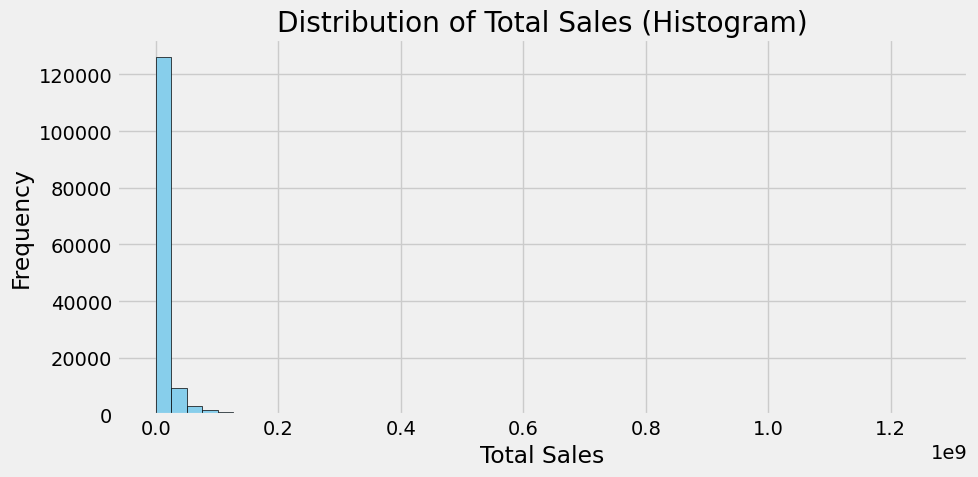

In [38]:
# We used a histogram to visualize the distribution of total_sales.
# This graph helps us understand:

#1.  Which sales ranges are most common 
#2.  Whether the data is skewed 
#3. It helps identify trends and outliers in ticket sales.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Graph size
plt.hist(data['total_sales'], bins=50, color='skyblue', edgecolor='black')  # bins = no. of bars

plt.title('Distribution of Total Sales (Histogram)')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


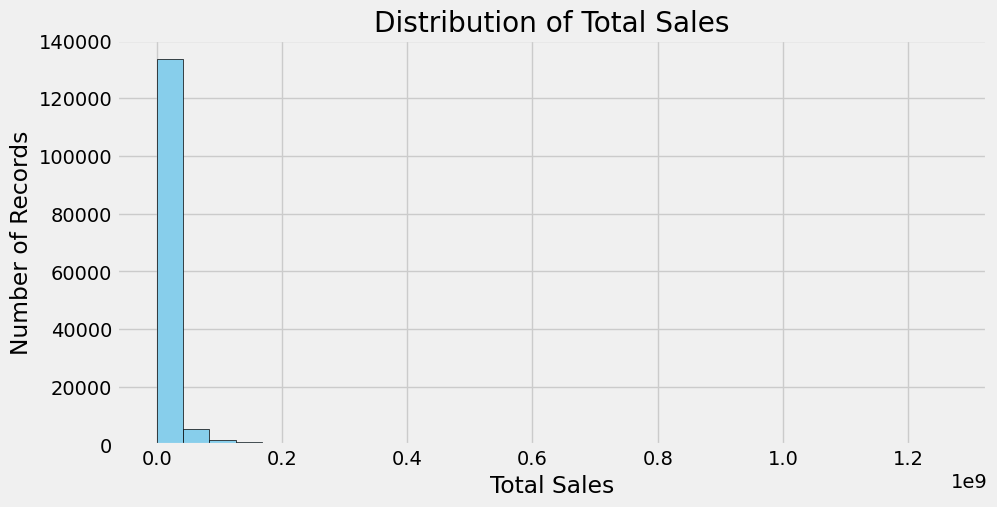

In [39]:
import matplotlib.pyplot as plt

# Histogram of total sales
plt.figure(figsize=(10, 5))
plt.hist(data['total_sales'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Number of Records')
plt.grid(True)
plt.show()

# distributed of total sales(histogram plot)
# This histogram shows how the total_sales values are distributed.
# It helps us understand how many cinema records fall into each sales range.
# For example, we can see if most cinemas made lower sales or higher sales.

<Axes: xlabel='cinema_code', ylabel='total_sales'>

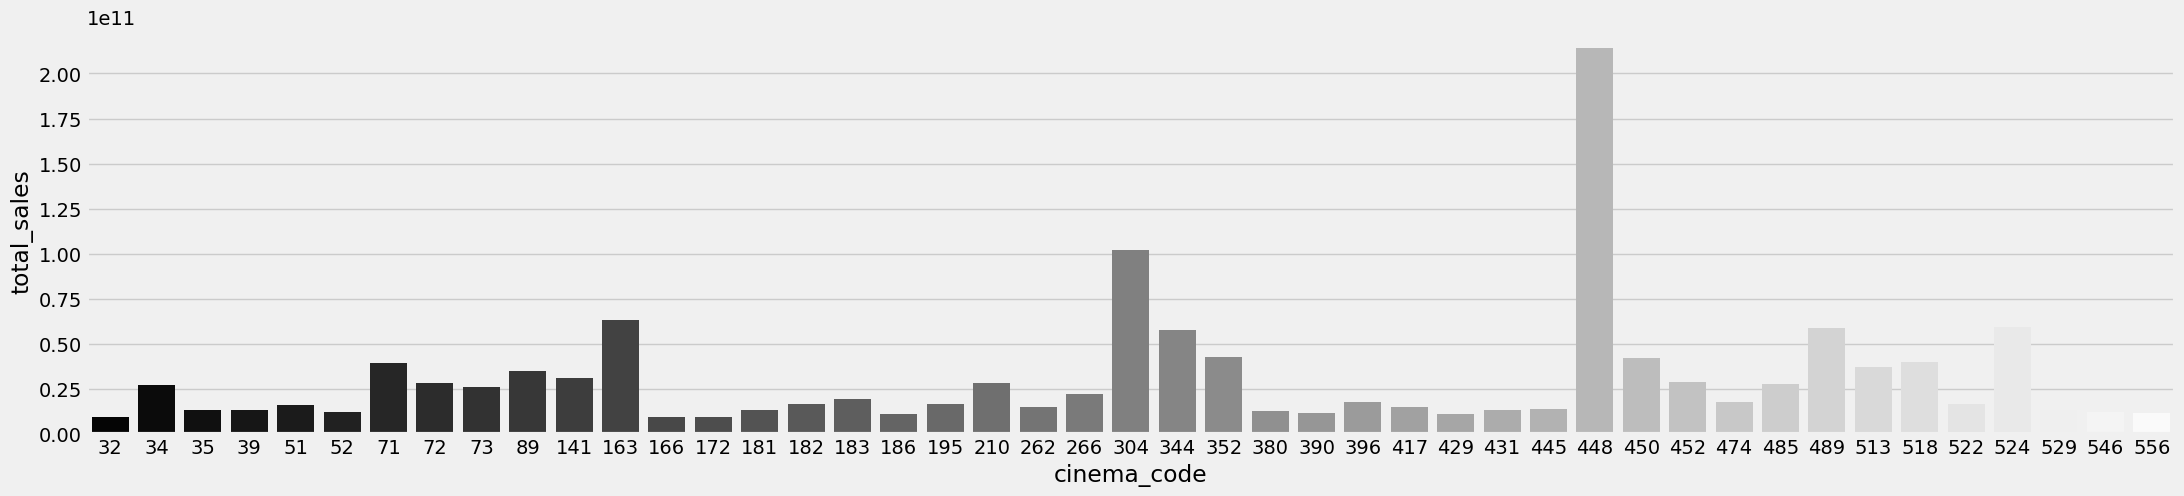

In [40]:
plt.style.use('fivethirtyeight')
cg = data.groupby('cinema_code', as_index=False)['total_sales'].sum()
cg = cg[cg.total_sales > 9.000000e+09]
plt.figure(figsize=(24, 5))
sns.barplot(data=cg, x='cinema_code', y='total_sales', palette='gray')

# This is a Bar plot
# It helps compare which cinemas had the highest total sales visually.

<Axes: xlabel='film_code'>

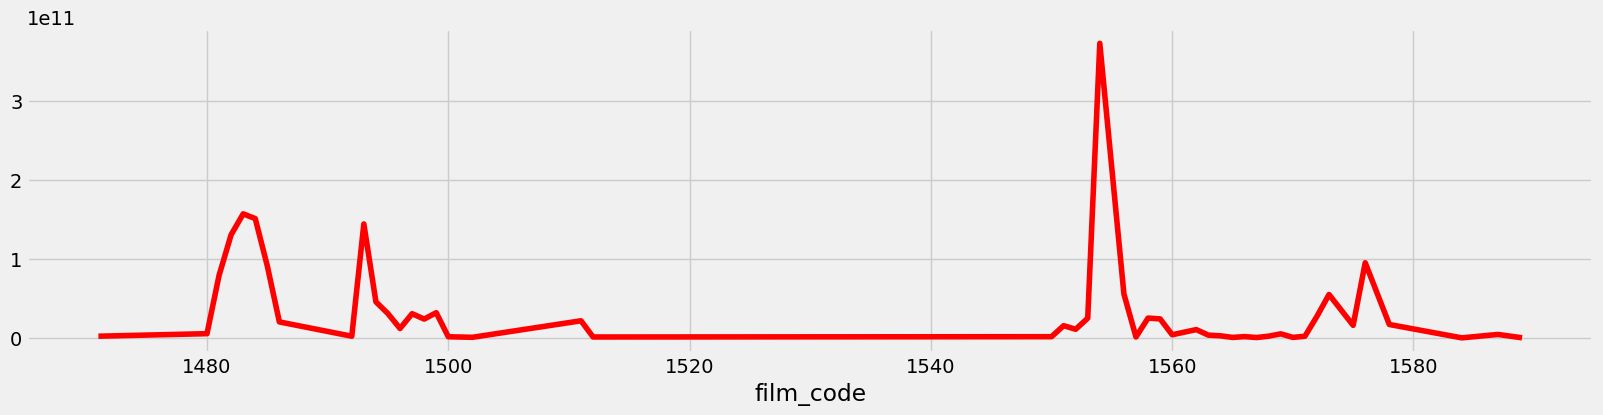

In [41]:
plt.style.use('fivethirtyeight')
data.groupby('film_code')['total_sales'].sum().plot(figsize=(18, 4), color='r')

# this is line plot
# The line plot helps us visualize and compare which films earned more or less.

<Axes: xlabel='film_code', ylabel='total_sales'>

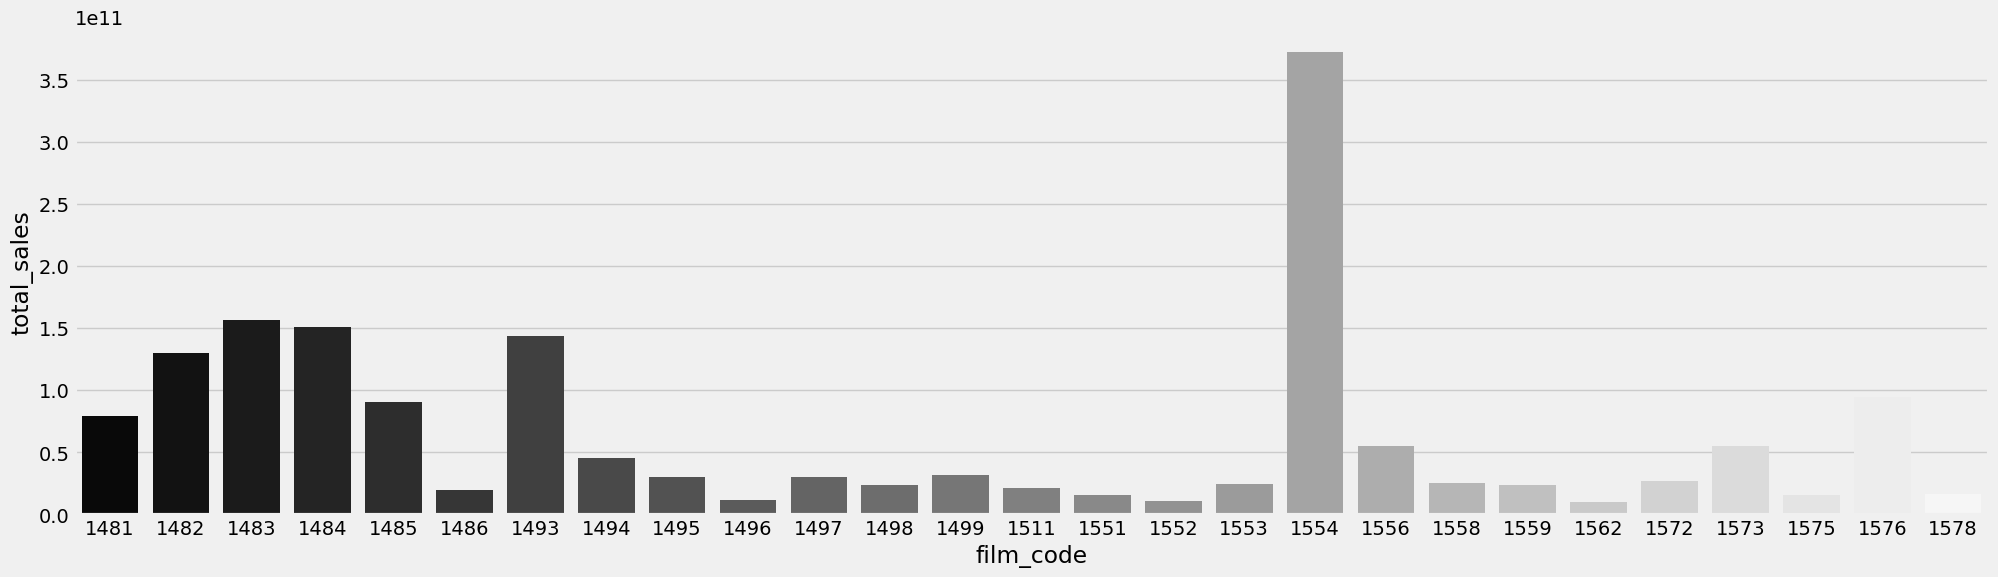

In [42]:
plt.style.use('fivethirtyeight')
fg = data.groupby('film_code', as_index=False)['total_sales'].sum()
fg = fg[fg.total_sales > 9.000000e+09]
plt.figure(figsize=(22, 6))
sns.barplot(data=fg, x='film_code', y='total_sales', palette='gray')


# This is a Bar plot
# It helps compare which cinemas had the highest total sales visually.

In [43]:
# You use data.total_sales.describe() to get a summary of statistics
# about the total_sales column in your dataset. 
# It helps you quickly understand the distribution and range of the data.
# It gives:

    
data.total_sales.describe()


count    1.425240e+05
mean     1.234728e+07
std      3.065486e+07
min      2.000000e+04
25%      1.260000e+06
50%      3.720000e+06
75%      1.110000e+07
max      1.262820e+09
Name: total_sales, dtype: float64

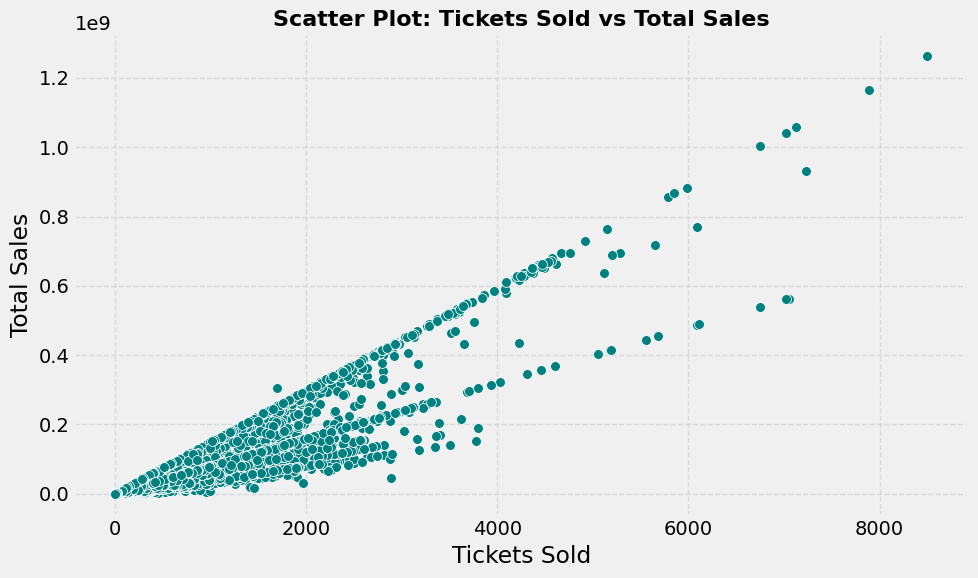

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='tickets_sold', y='total_sales', color='teal', s=50)

plt.title('Scatter Plot: Tickets Sold vs Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Tickets Sold')
plt.ylabel('Total Sales')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# We used a scatter plot to visually see the relationship between how many tickets were 
# sold (tickets_sold) and how much total sales (total_sales) were made. 
# This helps understand:
# Does selling more tickets always mean more sales?
# Are there any outliers (abnormal points)?
# What's the overall pattern?


NameError: name 'cols_to_drop' is not defined

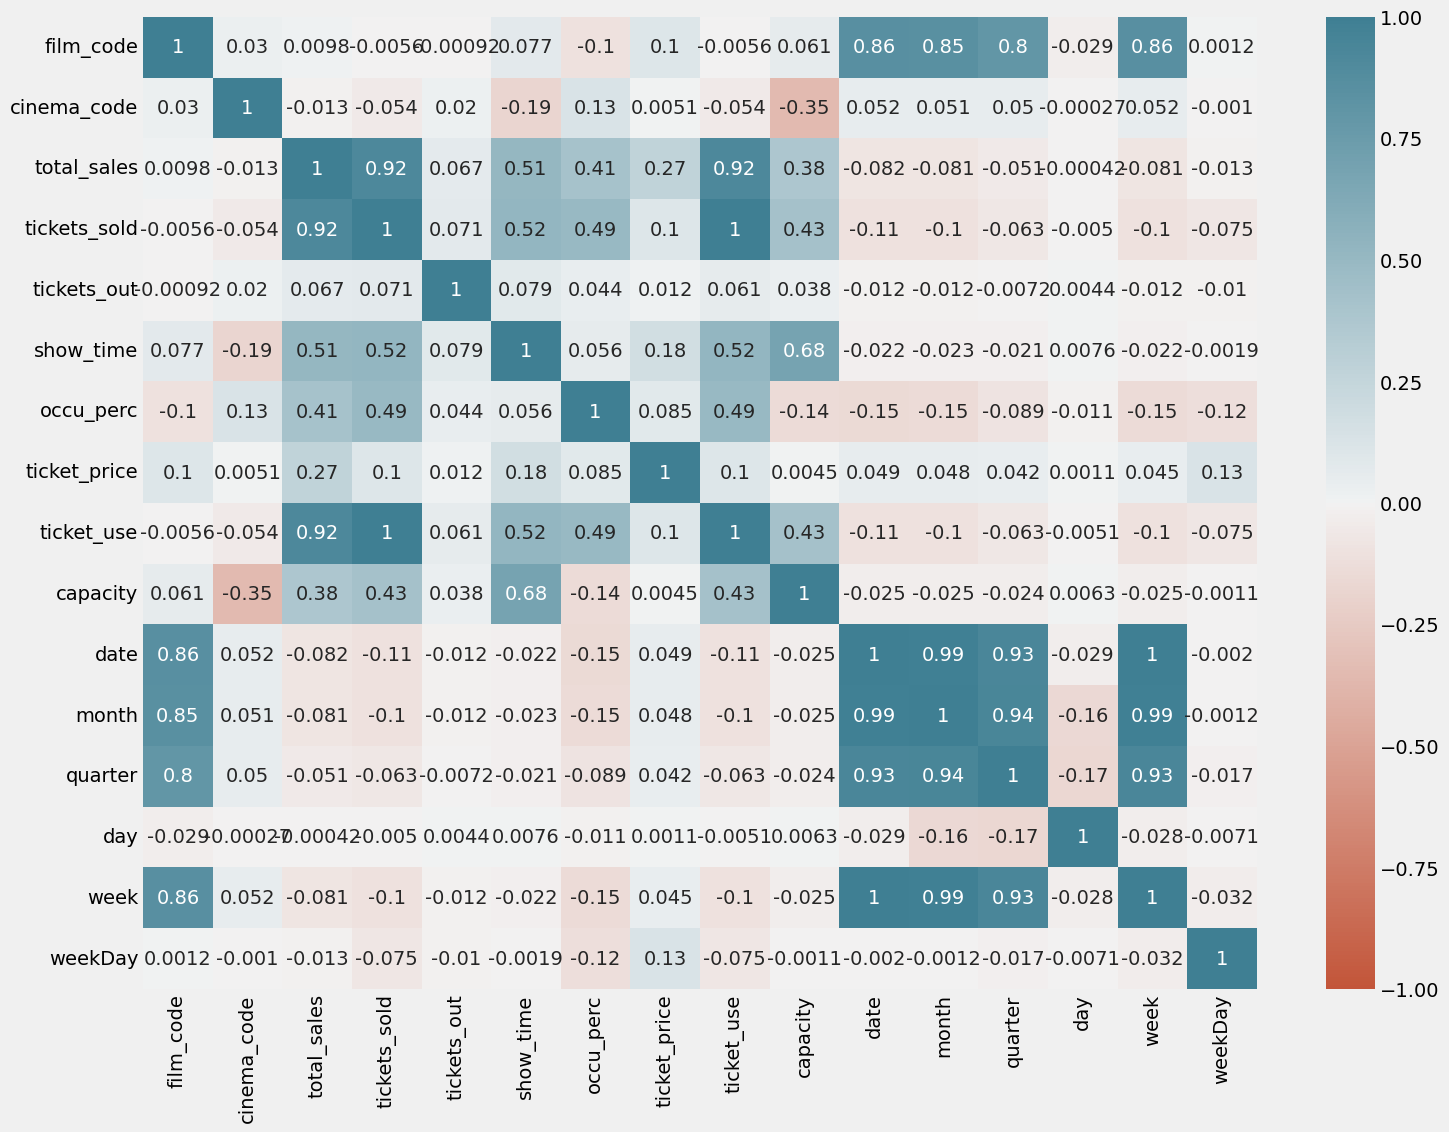

In [46]:
plt.figure(figsize = (16,12))
sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)
plt.show()

# this heatmap to visually analyze the correlation between 
# numeric features in the dataset.
# It shows how strongly two columns are related to each other.

# If correlation is near +1 → strong positive relation
# If correlation is near -1 → strong negative relation
# If near 0 → no relationship

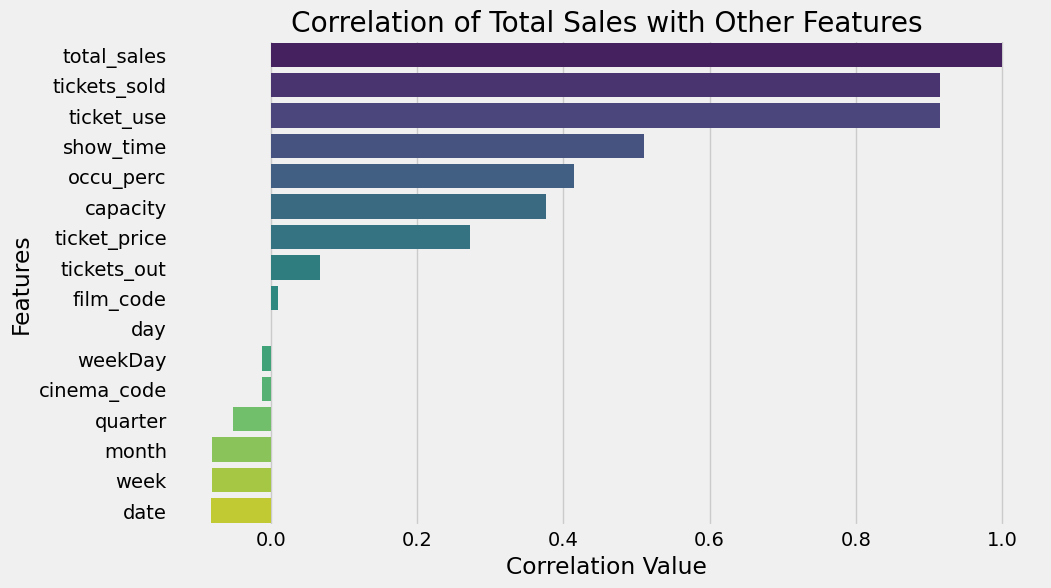

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation calculate kara
correlation = data.corr()['total_sales'].sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation of Total Sales with Other Features')
plt.xlabel('Correlation Value')
plt.ylabel('Features')
plt.show()


# data.corr() calculates the correlation between all numeric columns.

# ['total_sales'] selects the correlation of total_sales with every other feature.

# sort_values(ascending=False) sorts the values from high to low.

# Then, a bar plot is created using Seaborn to visually show which features affect
# total_sales the most.

# palette='viridis' adds a color style to the graph.





In [ ]:
Conclusion : In this project, we analyzed cinema sales data using data cleaning, 
visualization, and correlation analysis techniques. We explored various columns 
such as total_sales, ticket_price, and capacity, and used graphs like bar plots, 
line plots, scatter plots, and heatmaps to understand the trends and relationships.
    

Key findings:

Some cinemas had very high total sales.

Ticket price and number of tickets sold had a strong impact on total sales.

There is a clear correlation between cinema capacity and occupancy rate.

This analysis can help cinema owners and marketers to plan pricing, shows, 
and promotions more effectively.

Thank you..!

    